From https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit
from mag_flux_convert import *
from blackbody import *

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

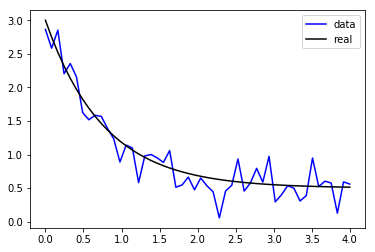

In [2]:
# generate data
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, y, 'k-', label='real')
plt.legend()
plt.show()

[2.55423706 1.35190947 0.47450618] 
 [[ 0.0158905   0.00681778 -0.0007614 ]
 [ 0.00681778  0.02019919  0.00541905]
 [-0.0007614   0.00541905  0.00282595]] 
 [[0.12605755 0.08256984        nan]
 [0.08256984 0.14212384 0.07361417]
 [       nan 0.07361417 0.05315968]]


C:\Users\Kornpob\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


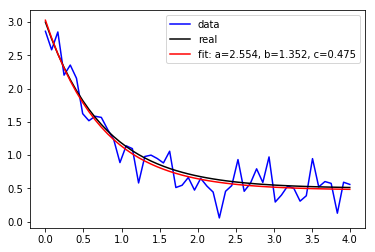

In [3]:
# fit
popt, pcov = curve_fit(func, xdata, ydata)
print(popt,'\n',pcov,'\n',np.sqrt(pcov))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, y, 'k-', label='real')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

[2.43708906 1.         0.35015434] 
 [[ 0.01521864  0.00291009 -0.00223465]
 [ 0.00291009  0.01677755  0.00839441]
 [-0.00223465  0.00839441  0.00615306]] 
 [[0.12336385 0.0539452         nan]
 [0.0539452  0.12952817 0.091621  ]
 [       nan 0.091621   0.07844143]]


C:\Users\Kornpob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


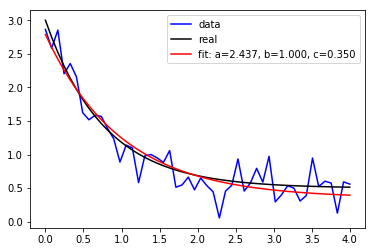

In [4]:
# fit with constraints
# 0 <= a <= 3, 0 <= b <= 1, 0 <= c <= 0.5
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt,'\n',pcov,'\n',np.sqrt(pcov))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, y, 'k-', label='real')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

[2.50855366 1.28741938 0.49821507] 
 [[1.40526324e-03 3.87029029e-04 2.39029195e-05]
 [3.87029029e-04 1.56000515e-04 1.25044115e-05]
 [2.39029195e-05 1.25044115e-05 1.30553144e-06]] 
 [[0.03748684 0.01967305 0.00488906]
 [0.01967305 0.01249002 0.00353616]
 [0.00488906 0.00353616 0.0011426 ]]


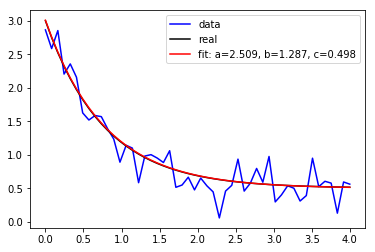

In [5]:
# fit with errors == chi-squared minimization
popt, pcov = curve_fit(func, xdata, ydata, sigma = y_noise)
print(popt,'\n',pcov,'\n',np.sqrt(pcov))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, y, 'k-', label='real')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

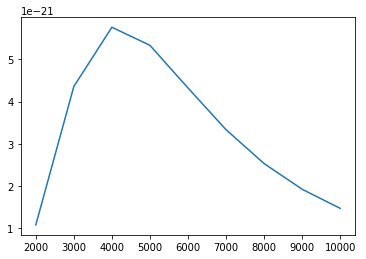

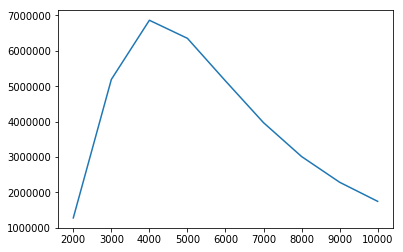

In [6]:
# test blackbody
wavelength = np.arange(2000., 11000., step=1000.)
temp = 7000.
flam = bb_lambda(wavelength, temp, 1.)
plt.plot(wavelength,flam)
plt.show()

from astropy.modeling.blackbody import blackbody_lambda
plt.plot(wavelength,blackbody_lambda(wavelength, temp))
plt.show()

[7.e+03 1.e-08] 
 [[ 4.98880038e-25 -3.28240812e-36]
 [-3.28240812e-36  2.35433334e-47]] 
 [[7.06314405e-13            nan]
 [           nan 4.85214730e-24]]


C:\Users\Kornpob\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


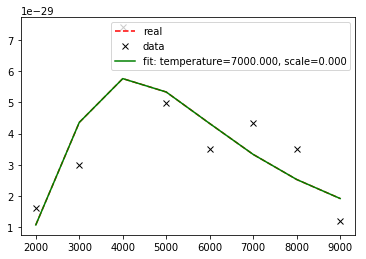

In [11]:
# fit blackbody no error
wavelength = np.arange(2000., 10000., step=1000.)
temp = 7000.
scale = 1e-8
y = bb_lambda(wavelength, temp, scale)

popt, pcov = curve_fit(bb_lambda, wavelength, y, p0=[5000., 2.])
print(popt,'\n',pcov,'\n',np.sqrt(pcov))

plt.plot(wavelength, y, 'r--', label='real')
plt.plot(wavelength, y_data, 'kx', label='data')
plt.plot(wavelength, bb_lambda(wavelength, *popt), 'g-', label='fit: temperature=%5.3f, scale=%5.3f' % tuple(popt))
plt.legend()
plt.show()

[7.23883594e+03 8.26738650e-09] 
 [[ 2.00139132e+05 -9.52180469e-07]
 [-9.52180469e-07  4.82572160e-18]] 
 [[4.47369123e+02            nan]
 [           nan 2.19675251e-09]]


C:\Users\Kornpob\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


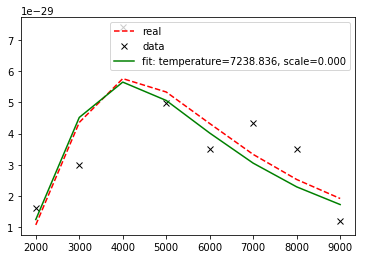

In [12]:
# fit blackbody add error
wavelength = np.arange(2000., 10000., step=1000.)
temp = 7000.
scale = 1e-8
y = bb_lambda(wavelength, temp, scale)

np.random.seed(1234)
y_noise = np.random.normal(size=wavelength.size) * np.median(y)*0.3
y_data = y + y_noise

popt, pcov = curve_fit(bb_lambda, wavelength, y_data, p0=[5000., 2.], sigma=y_noise)
print(popt,'\n',pcov,'\n',np.sqrt(pcov))

plt.plot(wavelength, y, 'r--', label='real')
plt.plot(wavelength, y_data, 'kx', label='data')
plt.plot(wavelength, bb_lambda(wavelength, *popt), 'g-', label='fit: temperature=%5.3f, scale=%5.3f' % tuple(popt))
plt.legend()
plt.show()

[7025.68231591   17.61553763] 
 [[3.36718609e+02 2.09736092e-01]
 [2.09736092e-01 1.87898163e-04]] 
 [[1.83498940e+01 4.57969531e-01]
 [4.57969531e-01 1.37075951e-02]]


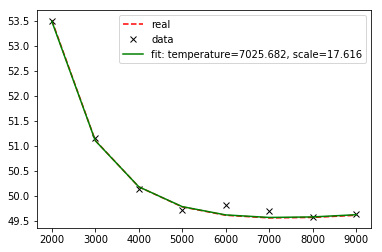

In [23]:
# fit blackbody in magnitude space
wavelength = np.arange(2000., 10000., step=1000.)
temp = 7000.
scale = 1e-8
y = bb_lambda(wavelength, temp, scale)
y = flux2mag(y, wavelength)

np.random.seed(12345)
y_noise = np.random.normal(size=wavelength.size) * 0.1
y_data = y + y_noise

popt, pcov = curve_fit(bb_lambda_mag, wavelength, y_data, p0=[5000., 2.], sigma=y_noise)
print(popt,'\n',pcov,'\n',np.sqrt(pcov))

plt.plot(wavelength, y, 'r--', label='real')
plt.plot(wavelength, y_data, 'kx', label='data')
plt.plot(wavelength, bb_lambda_mag(wavelength, *popt), 'g-', label='fit: temperature=%5.3f, scale=%5.3f' % tuple(popt))
plt.legend()
plt.show()

[9250.2946165   -13.18733084] 
 [[2.45284149e+05 8.22552557e+01]
 [8.22552557e+01 2.83521815e-02]] 
 [[4.95261698e+02 9.06946832e+00]
 [9.06946832e+00 1.68381060e-01]]


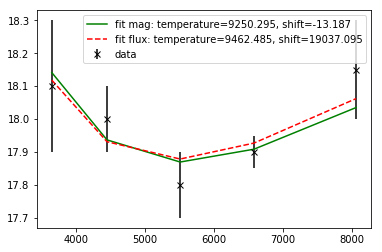

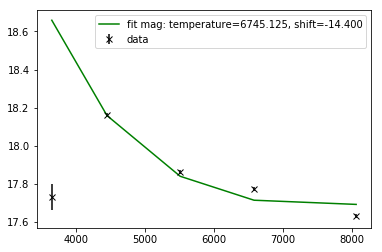

In [24]:
# try with real data: reproduce Figure 5 in Miller.
# Miller et al., 2009, ApJ, 690, 1303
# Figure 5: epochs = rest-frame days after discovery
# "We adopt the discovery date of SN 2008es, 2008 April 26" == 2454582.5 JD
# z = 0.213
# Extracting data directly from Figure 5 (simply looking at it)
# 26.6 days == 2454614.766 JD
# U = 18.1+-0.2, B = 18.0+-0.1, V = 17.8+-0.1, R = 17.9+-0.05, I = 18.15+-0.15
# 2454619.8 JD, Table 4
# U = 17.73+-0.07, B = 18.16+-0.01, V = 17.86+-0.01, R = 17.77+-0.01, I = 17.63+-0.01

band = np.array(['U','B','V','R','I'])
wavelength = np.array([3650., 4450., 5510., 6580., 8060.])
mag = np.array([18.1, 18.0, 17.8, 17.9, 18.15])
emag = np.array([0.2, 0.1, 0.1, 0.05, 0.15])

popt, pcov = curve_fit(bb_lambda_mag, wavelength, mag, p0=[5000., 1.], sigma=emag)
print(popt,'\n',pcov,'\n',np.sqrt(pcov))

popt2, pcov2 = curve_fit(bb_lambda, wavelength, mag2flux(mag, wavelength), p0=[5000., 1.])

plt.errorbar(wavelength, mag, emag, fmt='kx', label='data')
plt.plot(wavelength, bb_lambda_mag(wavelength, *popt), 'g-', label='fit mag: temperature=%5.3f, shift=%5.3f' % tuple(popt))
plt.plot(wavelength, flux2mag(bb_lambda(wavelength, *popt2), wavelength), 'r--', label='fit flux: temperature=%5.3f, shift=%5.3f' % tuple(popt2))
plt.legend()
plt.show()

mag = np.array([17.73, 18.16, 17.86, 17.77, 17.63])
emag = np.array([0.07, 0.01, 0.01, 0.01, 0.01])
popt3, pcov3 = curve_fit(bb_lambda_mag, wavelength, mag, p0=[5000., 1.], sigma=emag)
plt.errorbar(wavelength, mag, emag, fmt='kx', label='data')
plt.plot(wavelength, bb_lambda_mag(wavelength, *popt3), 'g-', label='fit mag: temperature=%5.3f, shift=%5.3f' % tuple(popt3))
plt.legend()
plt.show()